In [16]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fabric-defect-dataset/FYP/Fabric Defects Dataset/Fabric Defect Dataset/Vertical/20.jpg
/kaggle/input/fabric-defect-dataset/FYP/Fabric Defects Dataset/Fabric Defect Dataset/Vertical/6.jpg
/kaggle/input/fabric-defect-dataset/FYP/Fabric Defects Dataset/Fabric Defect Dataset/Vertical/5_processed (3).jpg
/kaggle/input/fabric-defect-dataset/FYP/Fabric Defects Dataset/Fabric Defect Dataset/Vertical/7_processed (1).jpg
/kaggle/input/fabric-defect-dataset/FYP/Fabric Defects Dataset/Fabric Defect Dataset/Vertical/7_processed (2).jpg
/kaggle/input/fabric-defect-dataset/FYP/Fabric Defects Dataset/Fabric Defect Dataset/Vertical/4_processed(3).jpg
/kaggle/input/fabric-defect-dataset/FYP/Fabric Defects Dataset/Fabric Defect Dataset/Vertical/5.jpg
/kaggle/input/fabric-defect-dataset/FYP/Fabric Defects Dataset/Fabric Defect Dataset/Vertical/8.jpg
/kaggle/input/fabric-defect-dataset/FYP/Fabric Defects Dataset/Fabric Defect Dataset/Vertical/9_processed (2).jpg
/kaggle/input/fabric-defect-da

In [17]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Subset, Dataset
from torchvision import models, transforms
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import os
from torch.optim.lr_scheduler import ReduceLROnPlateau
from sklearn.utils.class_weight import compute_class_weight
from sklearn.preprocessing import label_binarize  # Add this
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

In [18]:
class FabricDefectDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.classes = os.listdir(root_dir)
        self.class_to_idx = {cls: idx for idx, cls in enumerate(self.classes)}
        self.images = self._load_images()

    def _load_images(self):
        images = []
        for cls in self.classes:
            cls_dir = os.path.join(self.root_dir, cls)
            for img_name in os.listdir(cls_dir):
                img_path = os.path.join(cls_dir, img_name)
                images.append((img_path, self.class_to_idx[cls]))
        return images

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_path, label = self.images[idx]
        image = Image.open(img_path).convert('RGB')
        if self.transform:
            image = self.transform(image)
        return image, label

In [19]:
# Update transforms for ViT
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [20]:
dataset = FabricDefectDataset(root_dir='/kaggle/input/fabric-defect-dataset/FYP/Fabric Defects Dataset/Fabric Defect Dataset', transform=transform)

In [21]:
all_labels = [dataset[i][1] for i in range(len(dataset))]

# Initialize StratifiedKFold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
fold_results = []

Fold 1
Epoch [1/20], Loss: 1.7588, Accuracy: 35.38%, Val Loss: 1.0484, Val Accuracy: 64.71%
Epoch [2/20], Loss: 1.3057, Accuracy: 64.30%, Val Loss: 1.0289, Val Accuracy: 68.80%
Epoch [3/20], Loss: 1.1314, Accuracy: 79.33%, Val Loss: 0.6737, Val Accuracy: 78.77%
Epoch [4/20], Loss: 1.0670, Accuracy: 77.29%, Val Loss: 0.6241, Val Accuracy: 81.33%
Epoch [5/20], Loss: 1.0128, Accuracy: 79.65%, Val Loss: 0.6126, Val Accuracy: 83.63%
Epoch [6/20], Loss: 0.9932, Accuracy: 82.66%, Val Loss: 0.6512, Val Accuracy: 81.59%
Epoch [7/20], Loss: 0.9614, Accuracy: 81.77%, Val Loss: 0.6202, Val Accuracy: 82.35%
Epoch [8/20], Loss: 1.2179, Accuracy: 72.62%, Val Loss: 1.1610, Val Accuracy: 71.87%
Early stopping!


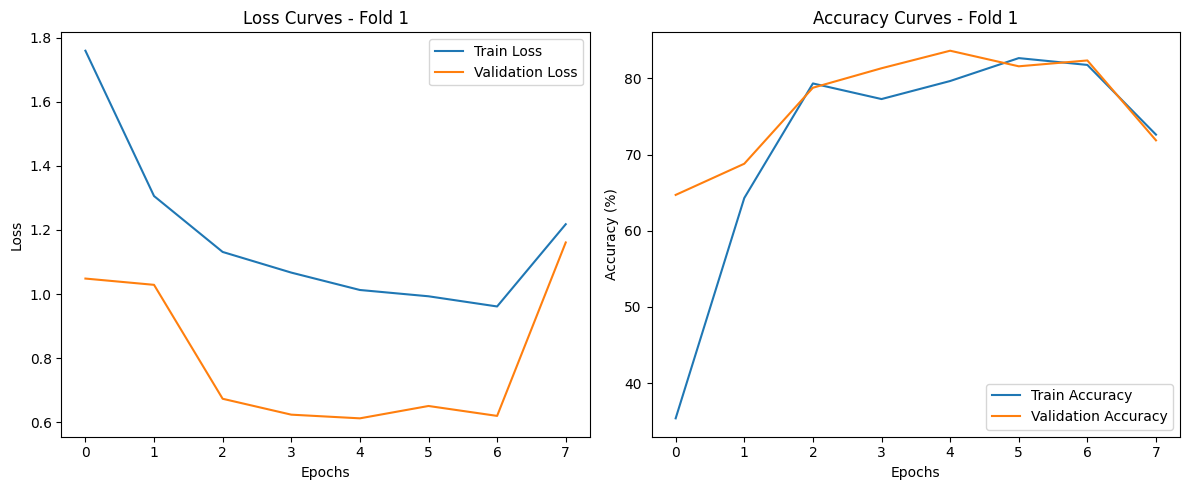

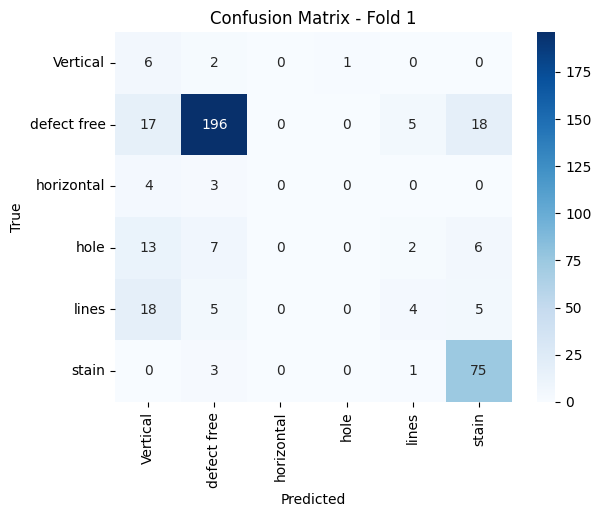

Classification Report - Fold 1
              precision    recall  f1-score   support

    Vertical       0.10      0.67      0.18         9
 defect free       0.91      0.83      0.87       236
  horizontal       0.00      0.00      0.00         7
        hole       0.00      0.00      0.00        28
       lines       0.33      0.12      0.18        32
       stain       0.72      0.95      0.82        79

    accuracy                           0.72       391
   macro avg       0.34      0.43      0.34       391
weighted avg       0.72      0.72      0.71       391



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


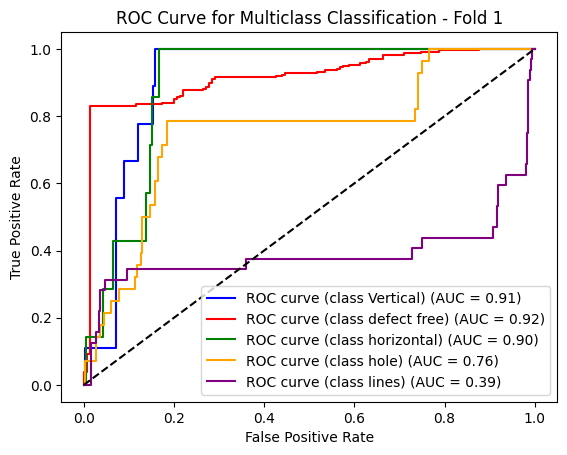


Image Index: 5
True Label: Vertical
Predicted Label: hole
Class Probabilities: [0.18701717 0.10589939 0.17521816 0.39847264 0.131556   0.00183659]


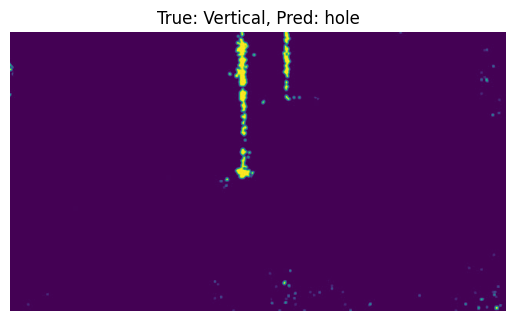


Image Index: 6
True Label: Vertical
Predicted Label: defect free
Class Probabilities: [0.32518336 0.32968274 0.16988632 0.1139966  0.06072313 0.00052786]


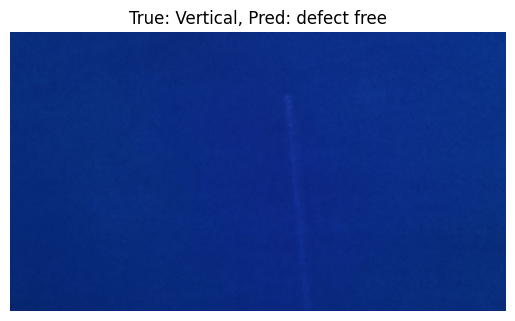


Image Index: 8
True Label: Vertical
Predicted Label: defect free
Class Probabilities: [0.20278913 0.5492254  0.10312732 0.07601259 0.06813507 0.0007105 ]


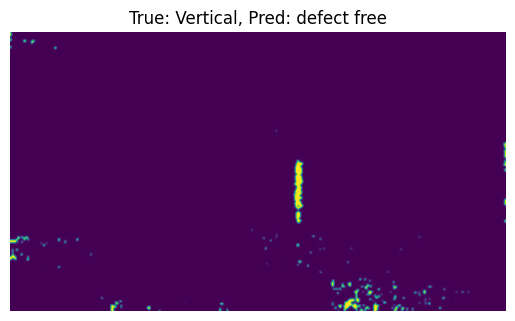


Image Index: 12
True Label: defect free
Predicted Label: stain
Class Probabilities: [0.00185683 0.00521263 0.00508399 0.01483828 0.15726227 0.81574607]


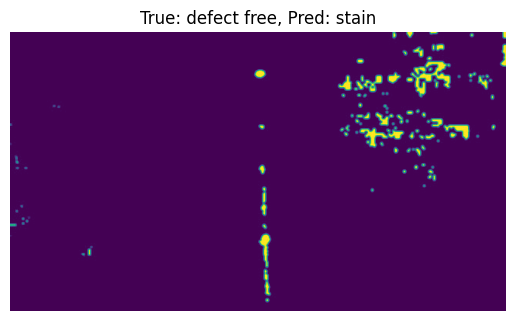


Image Index: 25
True Label: defect free
Predicted Label: Vertical
Class Probabilities: [0.3893373  0.20955068 0.20219293 0.14375368 0.05469391 0.00047154]


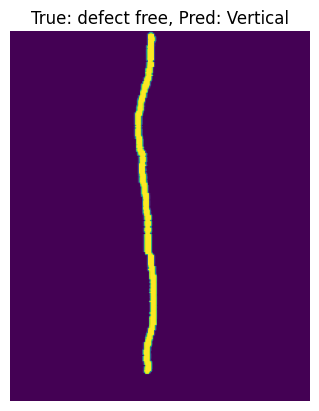


Image Index: 31
True Label: defect free
Predicted Label: Vertical
Class Probabilities: [0.39018556 0.21471502 0.20102149 0.13951817 0.05408751 0.00047224]


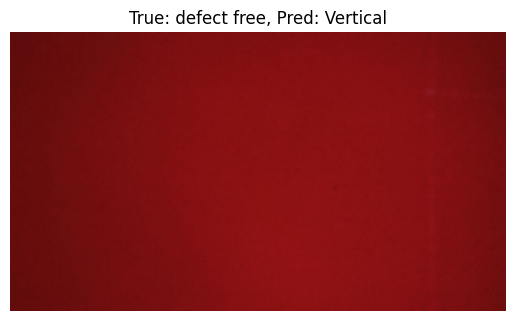


Image Index: 32
True Label: defect free
Predicted Label: Vertical
Class Probabilities: [0.29357085 0.2917012  0.17039736 0.16932869 0.07440716 0.00059471]


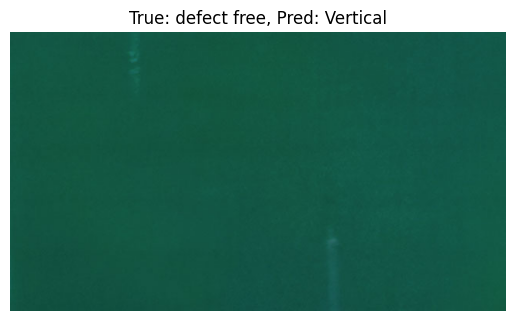


Image Index: 33
True Label: defect free
Predicted Label: stain
Class Probabilities: [0.00584788 0.01469867 0.0156056  0.04120263 0.45       0.47264525]


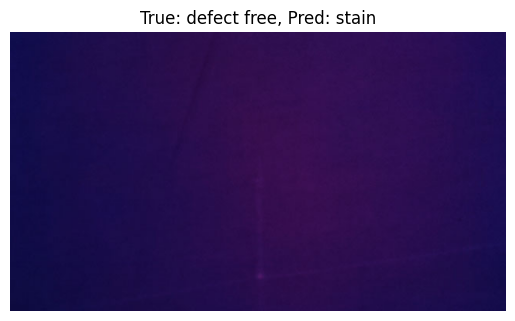


Image Index: 35
True Label: defect free
Predicted Label: Vertical
Class Probabilities: [0.31807306 0.25154462 0.18304397 0.17580298 0.07095635 0.00057903]


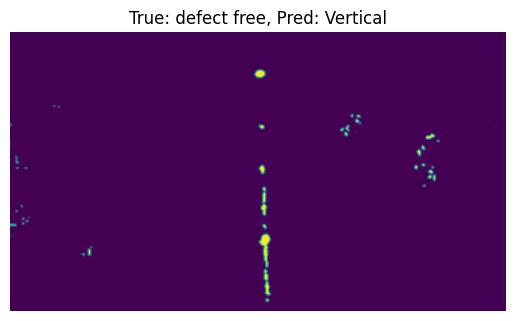


Image Index: 40
True Label: defect free
Predicted Label: Vertical
Class Probabilities: [0.41012245 0.16179137 0.21581219 0.159311   0.05251427 0.00044871]


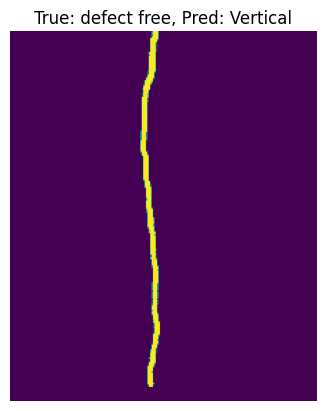

Fold 2
Epoch [1/20], Loss: 1.4380, Accuracy: 52.46%, Val Loss: 0.8521, Val Accuracy: 75.96%
Epoch [2/20], Loss: 1.0970, Accuracy: 76.07%, Val Loss: 0.7017, Val Accuracy: 75.45%
Epoch [3/20], Loss: 1.1390, Accuracy: 73.06%, Val Loss: 0.6601, Val Accuracy: 80.82%
Epoch [4/20], Loss: 0.9486, Accuracy: 82.28%, Val Loss: 0.5798, Val Accuracy: 80.31%
Epoch [5/20], Loss: 0.9307, Accuracy: 82.34%, Val Loss: 0.5404, Val Accuracy: 84.65%
Epoch [6/20], Loss: 0.8593, Accuracy: 81.51%, Val Loss: 0.5928, Val Accuracy: 82.35%
Epoch [7/20], Loss: 0.8248, Accuracy: 83.69%, Val Loss: 0.5157, Val Accuracy: 83.89%
Epoch [8/20], Loss: 0.7756, Accuracy: 83.37%, Val Loss: 0.4965, Val Accuracy: 82.86%
Epoch [9/20], Loss: 0.9995, Accuracy: 73.00%, Val Loss: 0.7593, Val Accuracy: 82.10%
Epoch [10/20], Loss: 0.9239, Accuracy: 81.57%, Val Loss: 0.5564, Val Accuracy: 80.56%
Epoch [11/20], Loss: 0.9003, Accuracy: 81.06%, Val Loss: 0.5203, Val Accuracy: 82.61%
Early stopping!


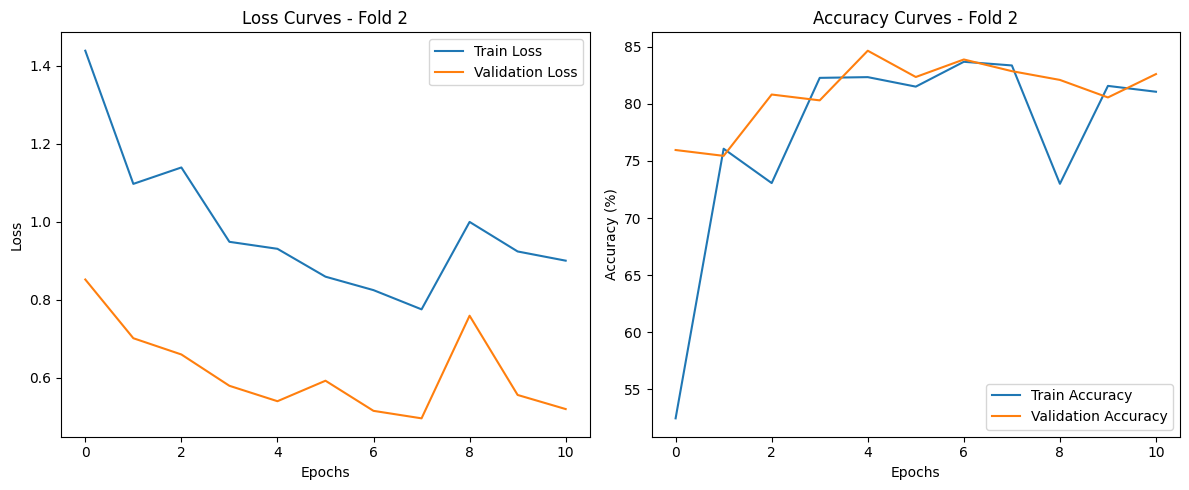

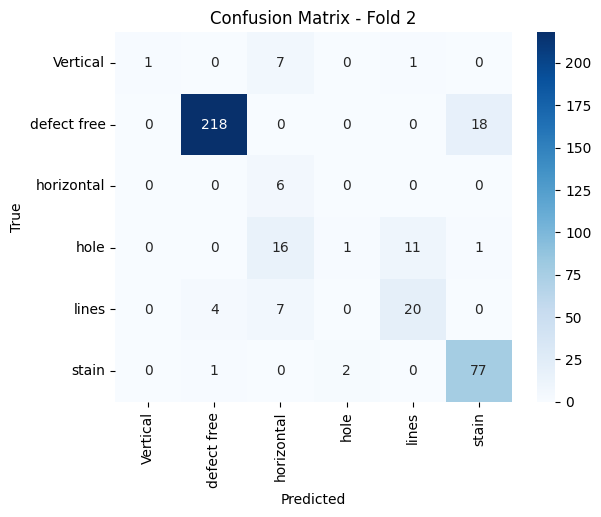

Classification Report - Fold 2
              precision    recall  f1-score   support

    Vertical       1.00      0.11      0.20         9
 defect free       0.98      0.92      0.95       236
  horizontal       0.17      1.00      0.29         6
        hole       0.33      0.03      0.06        29
       lines       0.62      0.65      0.63        31
       stain       0.80      0.96      0.88        80

    accuracy                           0.83       391
   macro avg       0.65      0.61      0.50       391
weighted avg       0.85      0.83      0.82       391



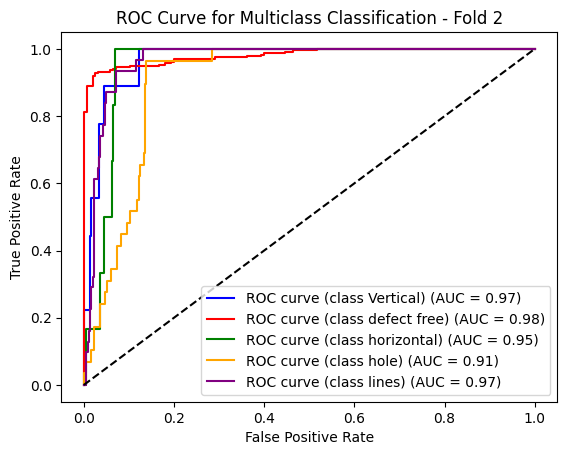


Image Index: 0
True Label: Vertical
Predicted Label: horizontal
Class Probabilities: [0.15452687 0.0368519  0.45285675 0.1526247  0.20107338 0.00206637]


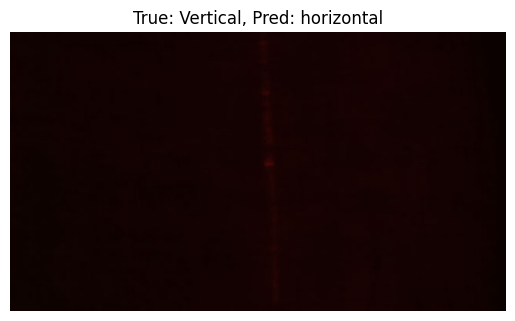


Image Index: 1
True Label: Vertical
Predicted Label: horizontal
Class Probabilities: [0.14232442 0.03762696 0.4539734  0.14188361 0.22213824 0.00205334]


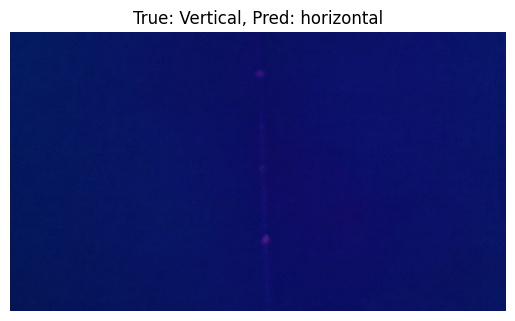


Image Index: 2
True Label: Vertical
Predicted Label: lines
Class Probabilities: [0.0496895  0.0209587  0.13741884 0.22853073 0.5603398  0.00306244]


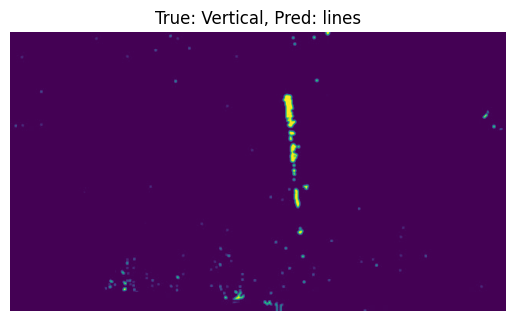


Image Index: 3
True Label: Vertical
Predicted Label: horizontal
Class Probabilities: [0.17765322 0.03966678 0.46081728 0.16219309 0.1575573  0.00211237]


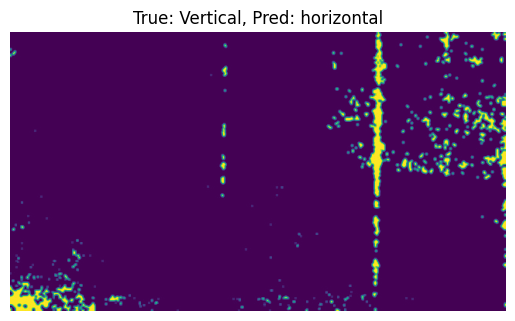


Image Index: 4
True Label: Vertical
Predicted Label: horizontal
Class Probabilities: [0.22395194 0.01623605 0.40450582 0.17369352 0.18004403 0.00156861]


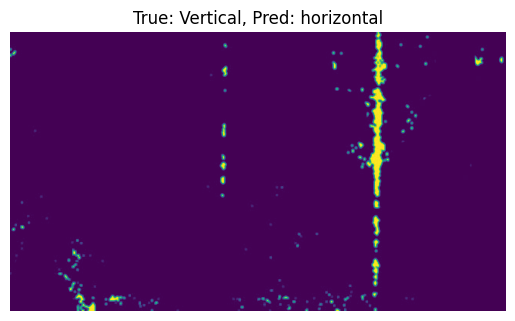


Image Index: 5
True Label: Vertical
Predicted Label: horizontal
Class Probabilities: [0.15151349 0.02015947 0.37481672 0.17178264 0.27975667 0.00197098]


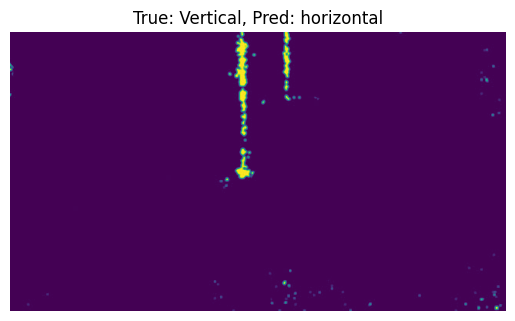


Image Index: 6
True Label: Vertical
Predicted Label: horizontal
Class Probabilities: [0.18197517 0.03688921 0.46127048 0.16103254 0.15678039 0.00205213]


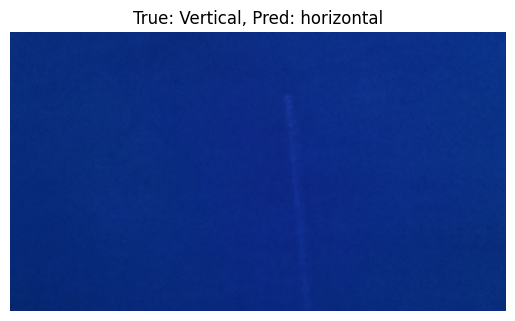


Image Index: 8
True Label: Vertical
Predicted Label: horizontal
Class Probabilities: [0.17506881 0.04155767 0.4604247  0.16299824 0.15779743 0.00215324]


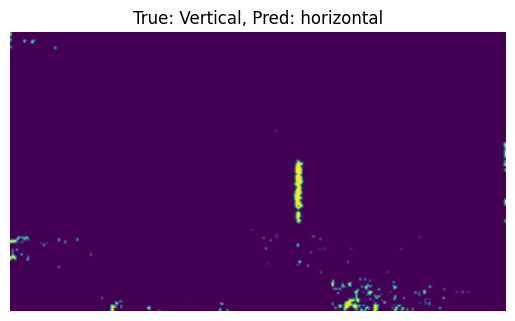


Image Index: 14
True Label: defect free
Predicted Label: stain
Class Probabilities: [2.4172135e-04 3.8377978e-02 4.0203722e-05 4.8997547e-03 3.6943835e-04
 9.5607090e-01]


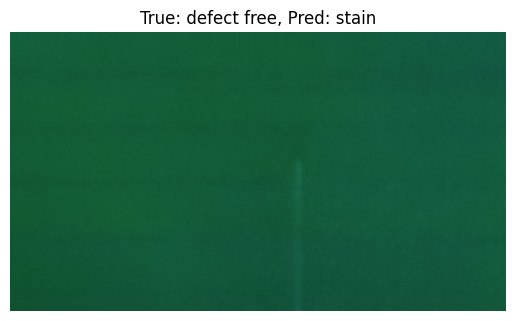


Image Index: 15
True Label: defect free
Predicted Label: stain
Class Probabilities: [2.6324828e-04 3.7630197e-02 4.2535296e-05 5.0843749e-03 3.5882776e-04
 9.5662081e-01]


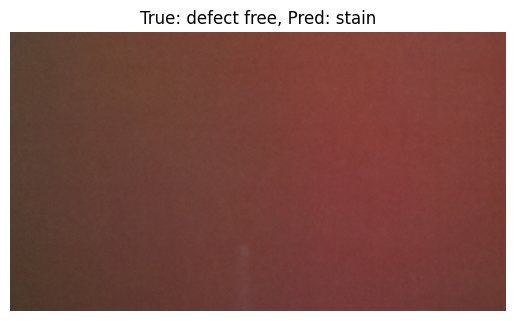

Fold 3
Epoch [1/20], Loss: 1.6990, Accuracy: 37.94%, Val Loss: 1.1032, Val Accuracy: 59.08%
Epoch [2/20], Loss: 1.2834, Accuracy: 62.12%, Val Loss: 0.8968, Val Accuracy: 68.03%
Epoch [3/20], Loss: 1.1545, Accuracy: 69.03%, Val Loss: 0.9376, Val Accuracy: 65.22%
Epoch [4/20], Loss: 1.0959, Accuracy: 75.82%, Val Loss: 0.6833, Val Accuracy: 78.77%
Epoch [5/20], Loss: 0.9965, Accuracy: 80.10%, Val Loss: 0.5740, Val Accuracy: 82.10%
Epoch [6/20], Loss: 0.9207, Accuracy: 79.72%, Val Loss: 0.5681, Val Accuracy: 79.80%
Epoch [7/20], Loss: 0.8746, Accuracy: 82.28%, Val Loss: 0.5540, Val Accuracy: 80.56%
Epoch [8/20], Loss: 0.7840, Accuracy: 84.01%, Val Loss: 0.4674, Val Accuracy: 83.12%
Epoch [9/20], Loss: 0.8714, Accuracy: 78.12%, Val Loss: 0.6337, Val Accuracy: 83.38%
Epoch [10/20], Loss: 0.8006, Accuracy: 83.69%, Val Loss: 0.5492, Val Accuracy: 83.12%
Epoch [11/20], Loss: 0.7352, Accuracy: 84.26%, Val Loss: 0.4942, Val Accuracy: 83.89%
Early stopping!


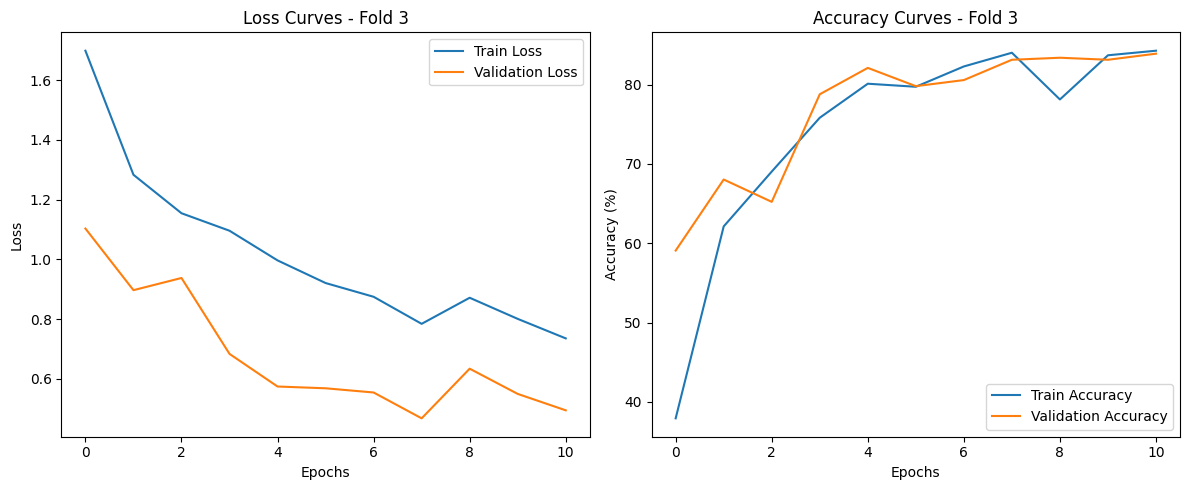

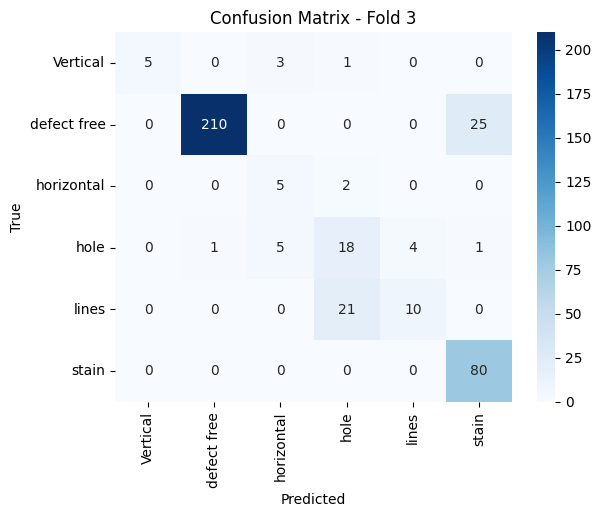

Classification Report - Fold 3
              precision    recall  f1-score   support

    Vertical       1.00      0.56      0.71         9
 defect free       1.00      0.89      0.94       235
  horizontal       0.38      0.71      0.50         7
        hole       0.43      0.62      0.51        29
       lines       0.71      0.32      0.44        31
       stain       0.75      1.00      0.86        80

    accuracy                           0.84       391
   macro avg       0.71      0.68      0.66       391
weighted avg       0.87      0.84      0.84       391



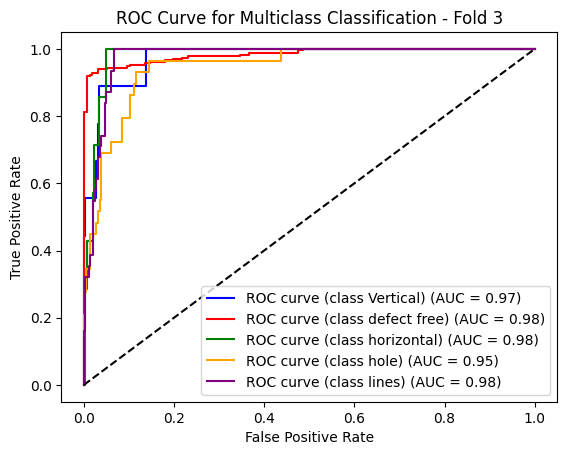


Image Index: 0
True Label: Vertical
Predicted Label: horizontal
Class Probabilities: [2.1506380e-01 3.9887941e-04 3.5075608e-01 3.1602544e-01 1.1767288e-01
 8.2929189e-05]


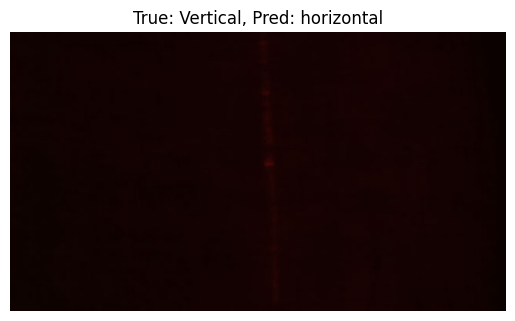


Image Index: 4
True Label: Vertical
Predicted Label: hole
Class Probabilities: [2.6987690e-02 1.0541461e-04 5.9294228e-02 5.5172694e-01 3.6179182e-01
 9.3845098e-05]


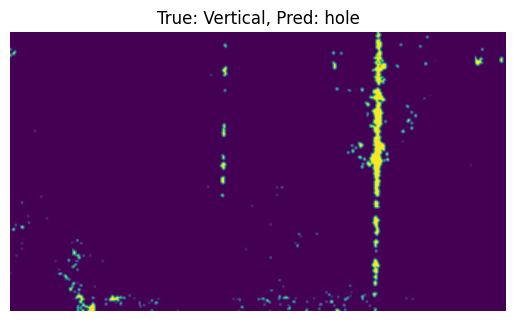


Image Index: 5
True Label: Vertical
Predicted Label: horizontal
Class Probabilities: [2.3770534e-01 5.5107020e-04 3.7356651e-01 2.7687940e-01 1.1120811e-01
 8.9529705e-05]


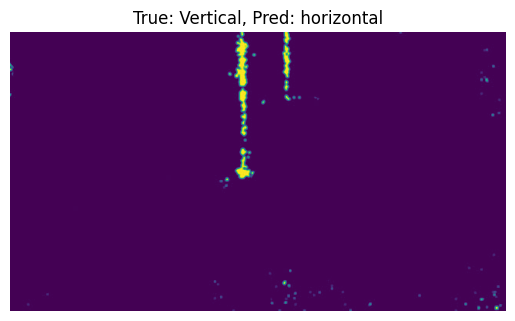


Image Index: 7
True Label: Vertical
Predicted Label: horizontal
Class Probabilities: [1.78540245e-01 8.55519902e-04 3.65051597e-01 3.12142223e-01
 1.43297955e-01 1.12446265e-04]


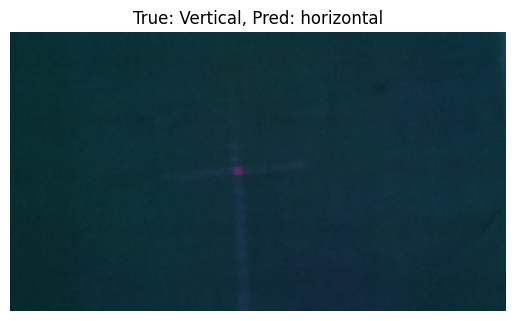


Image Index: 15
True Label: defect free
Predicted Label: stain
Class Probabilities: [0.16372429 0.10341149 0.00201586 0.02467891 0.00289937 0.7032701 ]


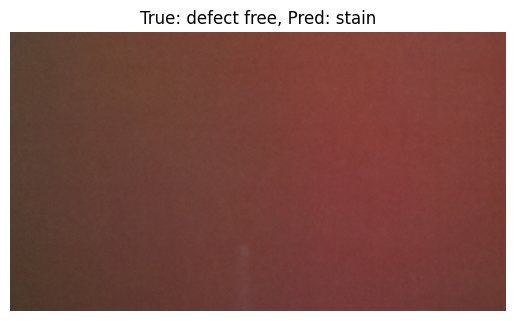


Image Index: 17
True Label: defect free
Predicted Label: stain
Class Probabilities: [0.02019153 0.0154676  0.00112217 0.07516088 0.00401328 0.8840446 ]


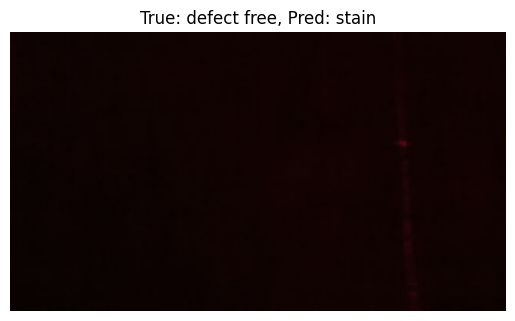


Image Index: 27
True Label: defect free
Predicted Label: stain
Class Probabilities: [2.8801672e-03 1.6744517e-02 2.3722988e-04 2.1997103e-02 1.6314659e-03
 9.5650947e-01]


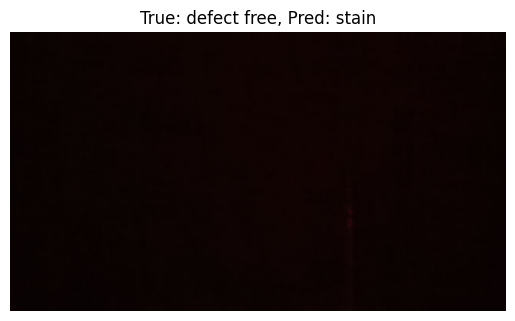


Image Index: 30
True Label: defect free
Predicted Label: stain
Class Probabilities: [1.1074777e-03 1.6906759e-02 1.0546031e-04 1.1452730e-02 1.0177805e-03
 9.6940988e-01]


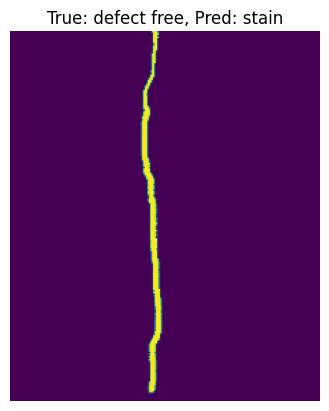


Image Index: 46
True Label: defect free
Predicted Label: stain
Class Probabilities: [3.7632706e-03 1.6622182e-02 3.0051015e-04 2.6652088e-02 1.8787340e-03
 9.5078319e-01]


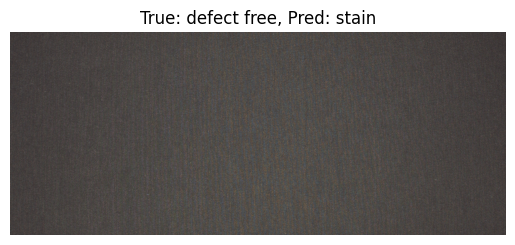


Image Index: 52
True Label: defect free
Predicted Label: stain
Class Probabilities: [0.03333349 0.01872784 0.00148392 0.08262522 0.00421654 0.85961306]


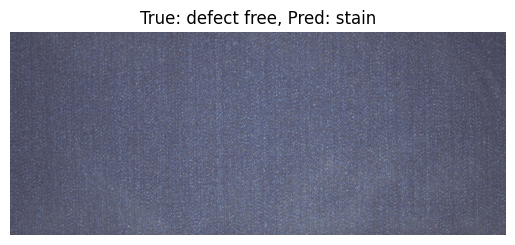

Fold 4
Epoch [1/20], Loss: 1.5552, Accuracy: 56.94%, Val Loss: 0.7890, Val Accuracy: 79.03%
Epoch [2/20], Loss: 1.1197, Accuracy: 76.20%, Val Loss: 0.5853, Val Accuracy: 82.35%
Epoch [3/20], Loss: 1.0093, Accuracy: 78.25%, Val Loss: 1.7843, Val Accuracy: 43.22%
Epoch [4/20], Loss: 1.0407, Accuracy: 77.86%, Val Loss: 0.7021, Val Accuracy: 79.03%
Epoch [5/20], Loss: 1.0744, Accuracy: 74.34%, Val Loss: 1.5307, Val Accuracy: 41.69%
Early stopping!


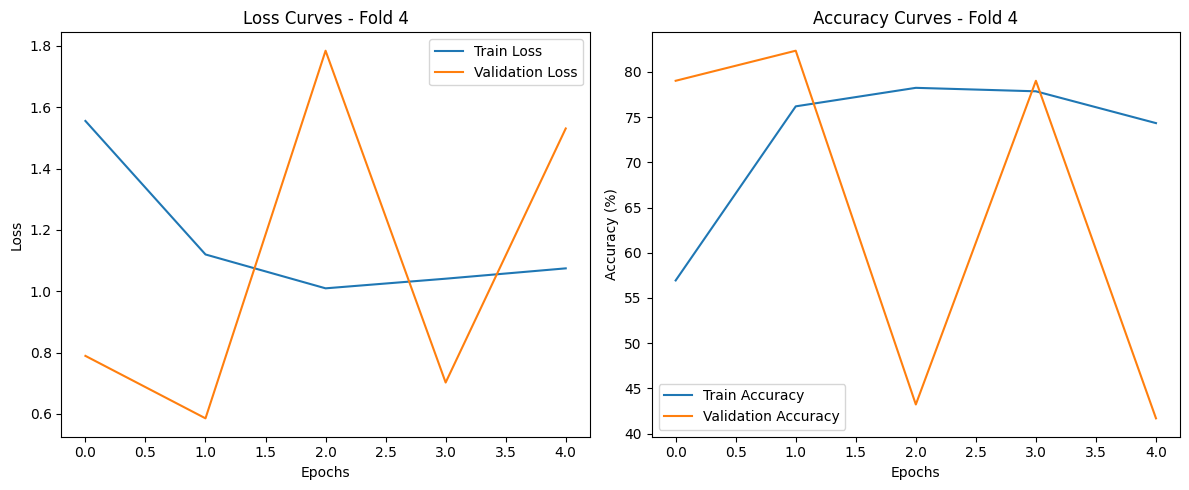

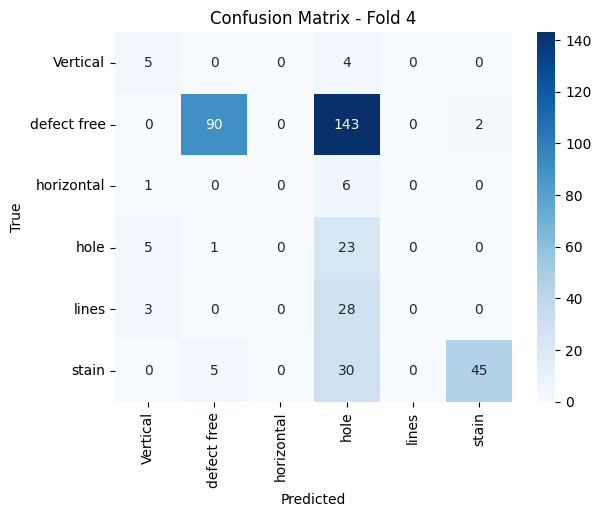

Classification Report - Fold 4
              precision    recall  f1-score   support

    Vertical       0.36      0.56      0.43         9
 defect free       0.94      0.38      0.54       235
  horizontal       0.00      0.00      0.00         7
        hole       0.10      0.79      0.17        29
       lines       0.00      0.00      0.00        31
       stain       0.96      0.56      0.71        80

    accuracy                           0.42       391
   macro avg       0.39      0.38      0.31       391
weighted avg       0.77      0.42      0.49       391



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


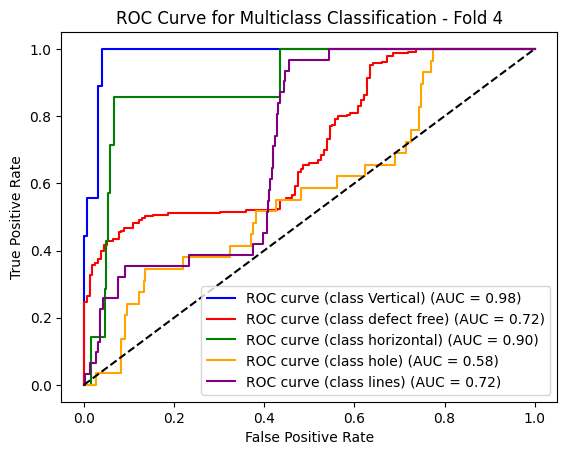


Image Index: 4
True Label: Vertical
Predicted Label: hole
Class Probabilities: [0.2801489  0.02594359 0.23893513 0.30179805 0.1503767  0.00279759]


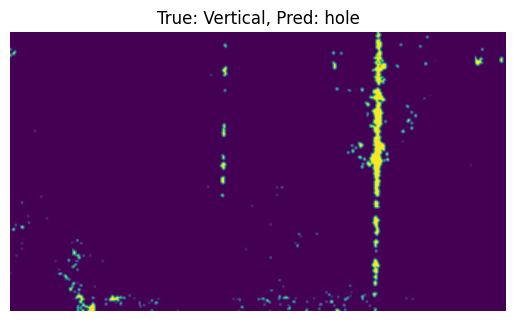


Image Index: 5
True Label: Vertical
Predicted Label: hole
Class Probabilities: [0.28555945 0.0261957  0.24151191 0.29727083 0.14673033 0.00273174]


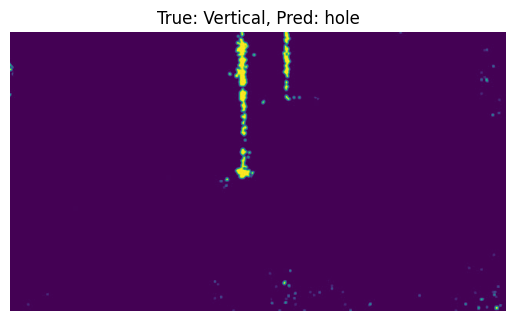


Image Index: 7
True Label: Vertical
Predicted Label: hole
Class Probabilities: [0.2820393  0.03036416 0.23751733 0.30160433 0.14554283 0.00293197]


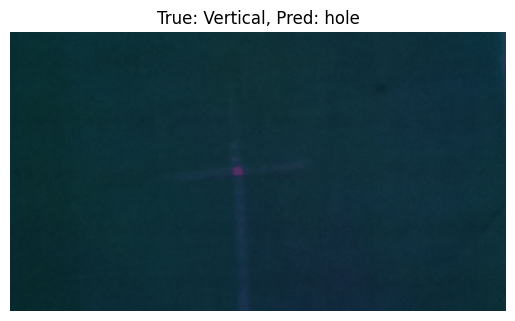


Image Index: 8
True Label: Vertical
Predicted Label: hole
Class Probabilities: [0.28555945 0.0261957  0.24151191 0.29727083 0.14673033 0.00273174]


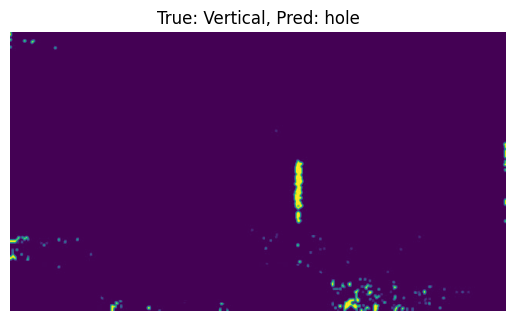


Image Index: 9
True Label: defect free
Predicted Label: hole
Class Probabilities: [0.00868845 0.03490251 0.0042136  0.8862617  0.01988337 0.04605044]


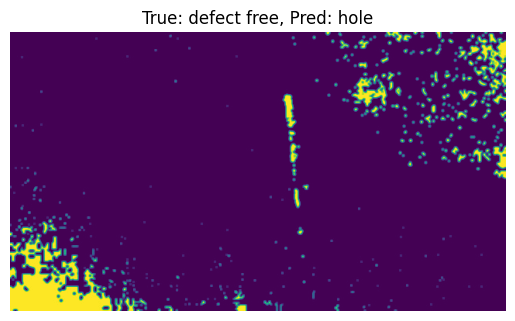


Image Index: 10
True Label: defect free
Predicted Label: hole
Class Probabilities: [0.25786167 0.03753076 0.22380866 0.3249305  0.1525234  0.00334504]


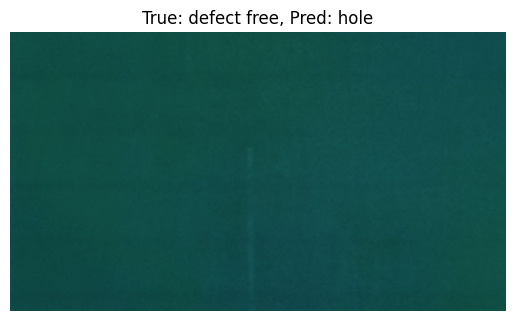


Image Index: 11
True Label: defect free
Predicted Label: hole
Class Probabilities: [0.25558916 0.03863935 0.2214021  0.32779863 0.15316695 0.00340381]


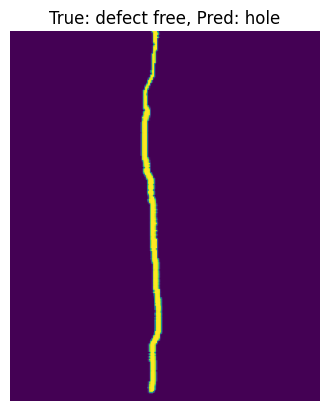


Image Index: 13
True Label: defect free
Predicted Label: hole
Class Probabilities: [0.24966674 0.04155023 0.21789919 0.33342156 0.15393749 0.00352481]


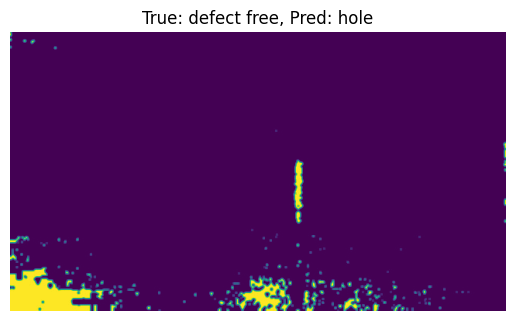


Image Index: 14
True Label: defect free
Predicted Label: hole
Class Probabilities: [0.18438289 0.08740674 0.17531103 0.39178976 0.15667973 0.00442985]


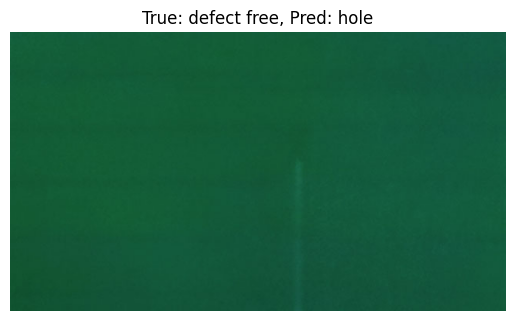


Image Index: 15
True Label: defect free
Predicted Label: hole
Class Probabilities: [0.25636688 0.03823055 0.22270499 0.3265138  0.15280612 0.00337765]


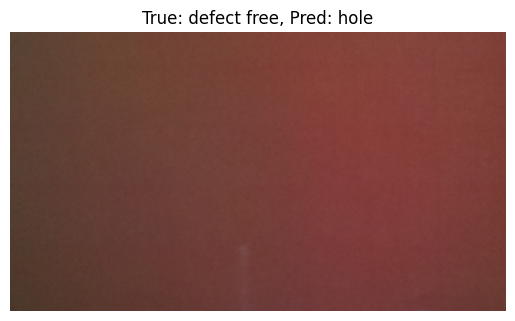

Fold 5
Epoch [1/20], Loss: 1.6509, Accuracy: 52.11%, Val Loss: 0.8957, Val Accuracy: 65.64%
Epoch [2/20], Loss: 1.1895, Accuracy: 72.12%, Val Loss: 0.5660, Val Accuracy: 83.08%
Epoch [3/20], Loss: 1.0572, Accuracy: 75.51%, Val Loss: 0.5628, Val Accuracy: 80.00%
Epoch [4/20], Loss: 1.0060, Accuracy: 77.88%, Val Loss: 1.0850, Val Accuracy: 58.72%
Epoch [5/20], Loss: 1.0290, Accuracy: 78.13%, Val Loss: 0.6382, Val Accuracy: 74.10%
Epoch [6/20], Loss: 0.9269, Accuracy: 80.69%, Val Loss: 0.4827, Val Accuracy: 83.85%
Epoch [7/20], Loss: 0.8968, Accuracy: 82.16%, Val Loss: 0.7588, Val Accuracy: 67.95%
Epoch [8/20], Loss: 0.9052, Accuracy: 78.64%, Val Loss: 0.5269, Val Accuracy: 83.33%
Epoch [9/20], Loss: 0.8036, Accuracy: 82.61%, Val Loss: 0.3987, Val Accuracy: 85.13%
Epoch [10/20], Loss: 0.7714, Accuracy: 82.67%, Val Loss: 0.4295, Val Accuracy: 84.10%
Epoch [11/20], Loss: 0.7626, Accuracy: 84.14%, Val Loss: 0.5065, Val Accuracy: 83.33%
Epoch [12/20], Loss: 0.9431, Accuracy: 73.02%, Val Loss:

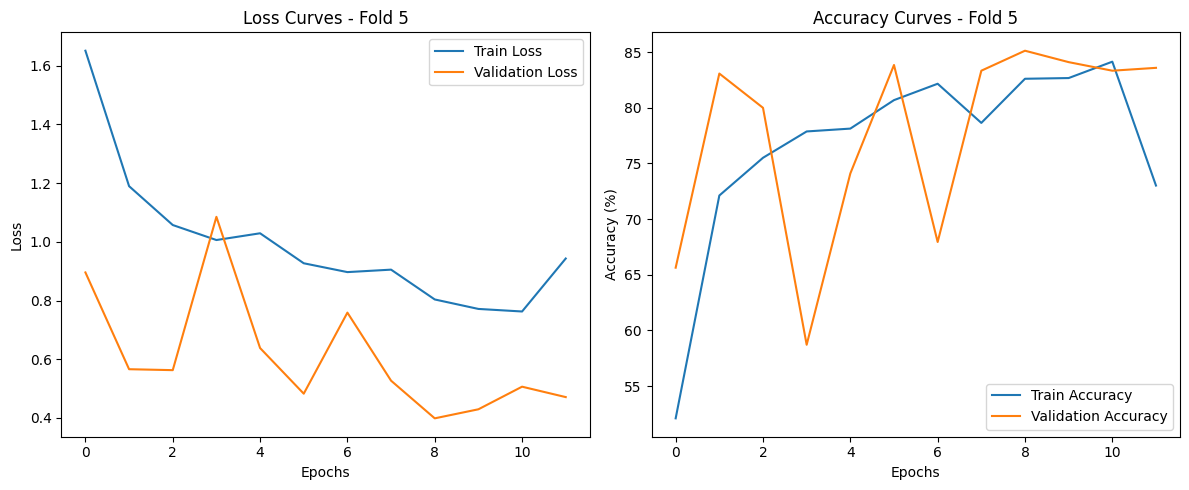

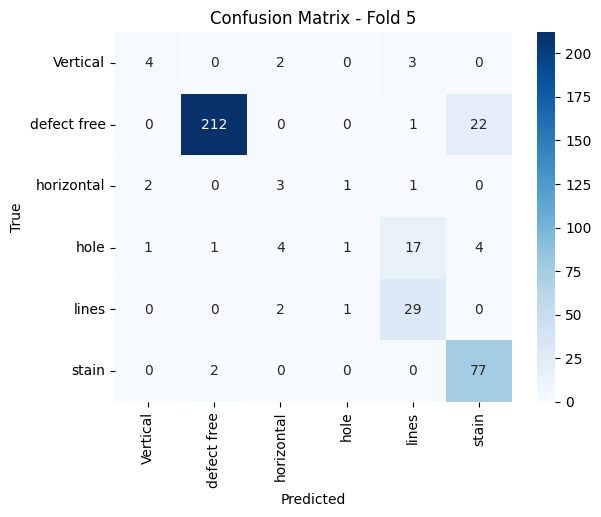

Classification Report - Fold 5
              precision    recall  f1-score   support

    Vertical       0.57      0.44      0.50         9
 defect free       0.99      0.90      0.94       235
  horizontal       0.27      0.43      0.33         7
        hole       0.33      0.04      0.06        28
       lines       0.57      0.91      0.70        32
       stain       0.75      0.97      0.85        79

    accuracy                           0.84       390
   macro avg       0.58      0.62      0.56       390
weighted avg       0.83      0.84      0.82       390



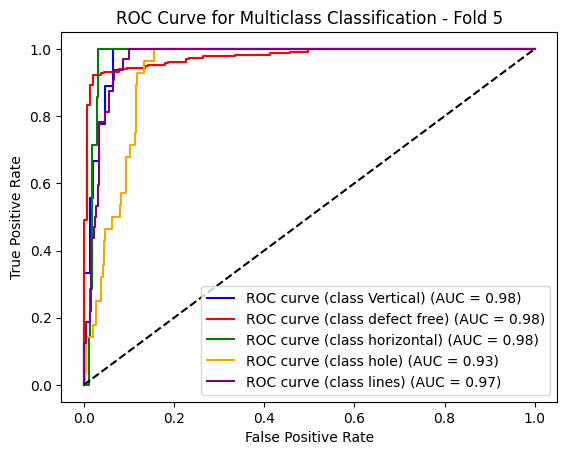


Image Index: 0
True Label: Vertical
Predicted Label: horizontal
Class Probabilities: [2.6718703e-01 2.0400754e-03 3.5160539e-01 2.2352985e-01 1.5556484e-01
 7.2755305e-05]


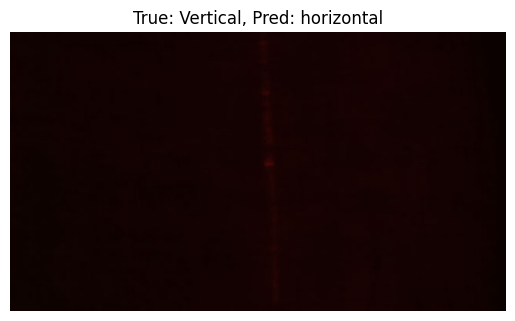


Image Index: 2
True Label: Vertical
Predicted Label: lines
Class Probabilities: [7.8672044e-02 5.5309893e-06 7.7652335e-03 3.2187772e-01 5.9144598e-01
 2.3349970e-04]


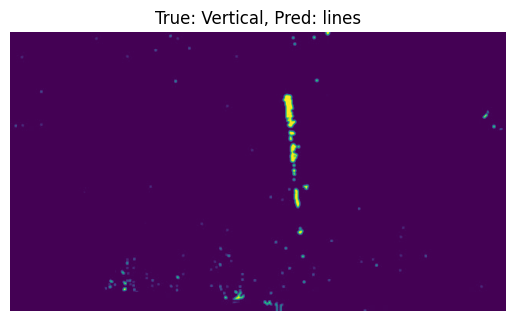


Image Index: 3
True Label: Vertical
Predicted Label: lines
Class Probabilities: [2.7671009e-02 3.2359979e-04 2.1079585e-03 4.3230447e-01 5.0815028e-01
 2.9442701e-02]


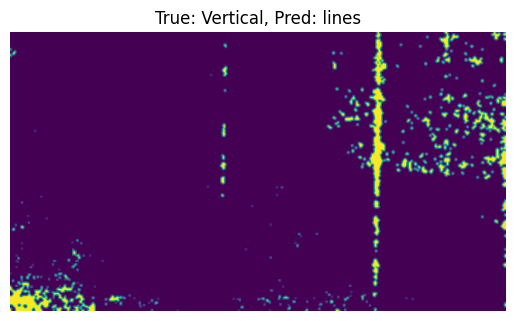


Image Index: 6
True Label: Vertical
Predicted Label: lines
Class Probabilities: [2.1626391e-01 1.1790786e-03 1.3806604e-01 2.6335973e-01 3.8101670e-01
 1.1452689e-04]


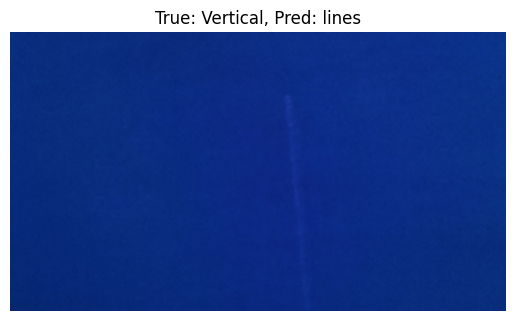


Image Index: 7
True Label: Vertical
Predicted Label: horizontal
Class Probabilities: [2.8781861e-01 1.8612788e-03 3.5101089e-01 2.1406732e-01 1.4517029e-01
 7.1639748e-05]


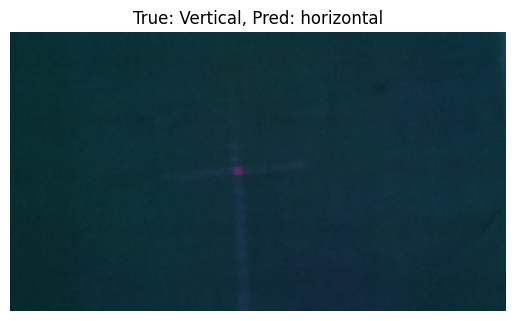


Image Index: 20
True Label: defect free
Predicted Label: stain
Class Probabilities: [2.6523343e-05 5.0187554e-02 1.7129854e-05 2.9261864e-03 1.0491892e-03
 9.4579345e-01]


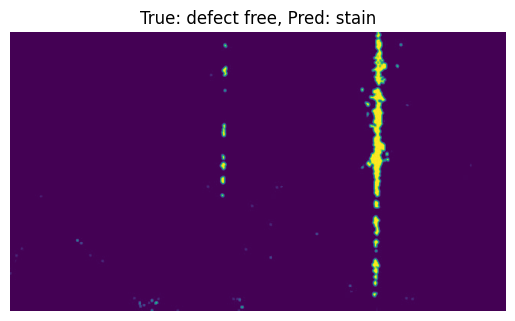


Image Index: 29
True Label: defect free
Predicted Label: stain
Class Probabilities: [1.3138789e-03 2.8139573e-02 4.3249482e-04 1.6001278e-01 1.9501254e-01
 6.1508876e-01]


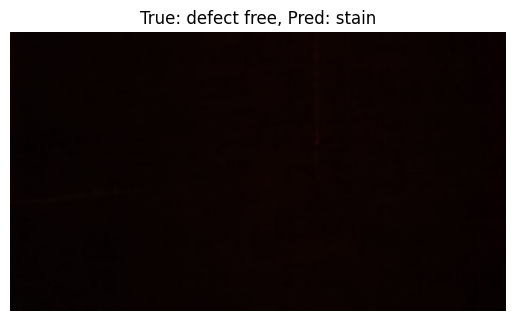


Image Index: 34
True Label: defect free
Predicted Label: stain
Class Probabilities: [1.5170949e-04 1.9931400e-01 1.0259266e-04 8.6859437e-03 3.9106230e-03
 7.8783506e-01]


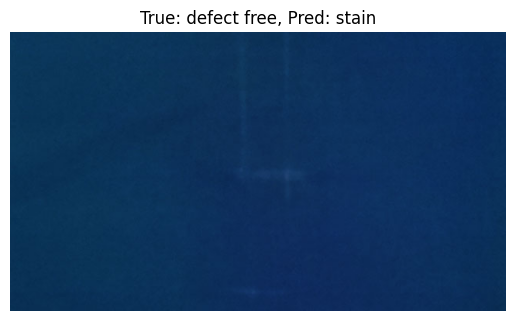


Image Index: 36
True Label: defect free
Predicted Label: stain
Class Probabilities: [1.60933312e-04 2.26247609e-01 1.10123154e-04 8.67969356e-03
 4.06682398e-03 7.60734797e-01]


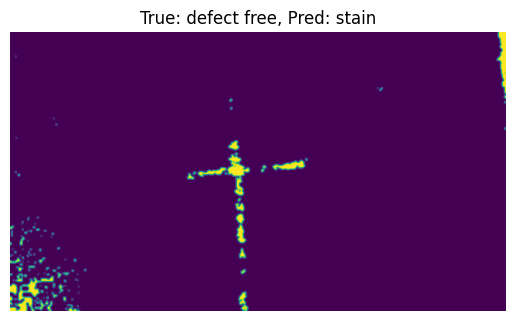


Image Index: 44
True Label: defect free
Predicted Label: stain
Class Probabilities: [4.58541144e-05 1.14730865e-01 3.11906842e-05 3.68213025e-03
 1.44035893e-03 8.80069613e-01]


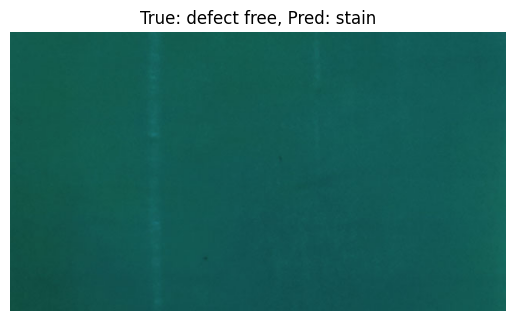

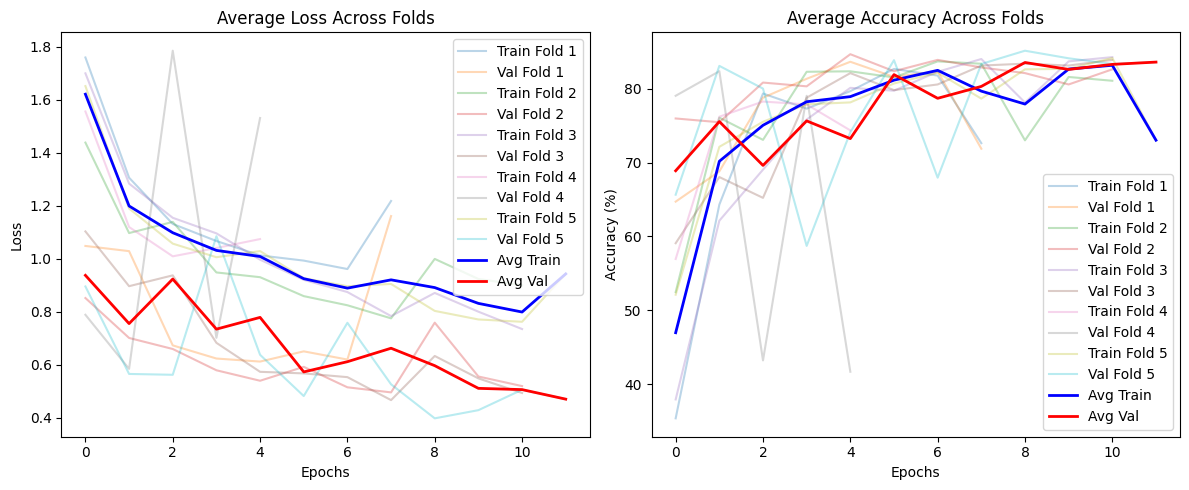


Average Training Loss: 1.0682
Average Validation Loss: 0.7570
Average Training Accuracy: 74.52%
Average Validation Accuracy: 75.50%


In [22]:
for fold, (train_idx, val_idx) in enumerate(kf.split(np.zeros(len(dataset)), all_labels)):
    print(f"Fold {fold + 1}")
    
    train_dataset = Subset(dataset, train_idx)
    val_dataset = Subset(dataset, val_idx)
    
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

    # Calculate class weights
    train_labels = [all_labels[i] for i in train_idx]
    class_weights = compute_class_weight('balanced', 
                                       classes=np.unique(all_labels),
                                       y=train_labels)
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    class_weights = torch.tensor(class_weights, dtype=torch.float32).to(device)

    # Load pre-trained ViT model
    model = models.vit_b_16(weights=models.ViT_B_16_Weights.IMAGENET1K_V1)
    # Modify the head
    num_ftrs = model.heads.head.in_features
    model.heads.head = nn.Linear(num_ftrs, len(dataset.classes))
    model = model.to(device)
    
    # Loss function with class weights
    criterion = nn.CrossEntropyLoss(weight=class_weights)
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=2)
    
    # Early stopping
    best_val_loss = float('inf')
    patience = 3
    trigger_times = 0
    
    # Training loop
    num_epochs = 20
    train_losses, val_losses, train_accs, val_accs = [], [], [], []
    
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0
        
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()
        
        train_loss = running_loss / len(train_loader)
        train_acc = 100. * correct / total
        train_losses.append(train_loss)
        train_accs.append(train_acc)
        
        # Validation
        model.eval()
        val_loss = 0.0
        correct = 0
        total = 0
        true_labels, predicted_labels, predictions = [], [], []
        
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                _, predicted = outputs.max(1)
                total += labels.size(0)
                correct += predicted.eq(labels).sum().item()
                
                true_labels.extend(labels.cpu().numpy())
                predicted_labels.extend(predicted.cpu().numpy())
                predictions.extend(torch.softmax(outputs, dim=1).cpu().numpy())
        
        val_loss /= len(val_loader)
        val_acc = 100. * correct / total
        val_losses.append(val_loss)
        val_accs.append(val_acc)
        
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {train_loss:.4f}, Accuracy: {train_acc:.2f}%, Val Loss: {val_loss:.4f}, Val Accuracy: {val_acc:.2f}%')
        
        # Learning rate scheduler
        scheduler.step(val_loss)
        
        # Early stopping
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            trigger_times = 0
        else:
            trigger_times += 1
            if trigger_times >= patience:
                print("Early stopping!")
                break
    
    # Store fold results and plot (same as original code)
    fold_results.append({
        'train_losses': train_losses,
        'val_losses': val_losses,
        'train_accs': train_accs,
        'val_accs': val_accs,
        'true_labels': true_labels,
        'predicted_labels': predicted_labels,
        'predictions': predictions
    })

     # After training loop, plot graphs
    plt.figure(figsize=(12, 5))
    
    # Loss plot
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.title(f'Loss Curves - Fold {fold + 1}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    # Accuracy plot
    plt.subplot(1, 2, 2)
    plt.plot(train_accs, label='Train Accuracy')
    plt.plot(val_accs, label='Validation Accuracy')
    plt.title(f'Accuracy Curves - Fold {fold + 1}')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy (%)')
    plt.legend()
    
    plt.tight_layout()
    plt.show()


    # Confusion Matrix
    cm = confusion_matrix(true_labels, predicted_labels)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=dataset.classes, yticklabels=dataset.classes)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix - Fold {fold + 1}')
    plt.show()

    # Classification Report
    print(f"Classification Report - Fold {fold + 1}")
    print(classification_report(true_labels, predicted_labels, target_names=dataset.classes))

    # ROC/AUC Curve for Multiclass Classification
    true_labels_bin = label_binarize(true_labels, classes=np.arange(len(dataset.classes)))

    # Compute ROC curve and AUC for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(len(dataset.classes)):
        fpr[i], tpr[i], _ = roc_curve(true_labels_bin[:, i], np.array(predictions)[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot ROC curve for each class
    plt.figure()
    colors = ['blue', 'red', 'green', 'orange', 'purple']  # Add more colors if needed
    for i, color in zip(range(len(dataset.classes)), colors):
        plt.plot(fpr[i], tpr[i], color=color, label=f'ROC curve (class {dataset.classes[i]}) (AUC = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for Multiclass Classification - Fold {fold + 1}')
    plt.legend(loc="lower right")
    plt.show()

    # Misclassified Images
    misclassified_idx = [i for i, (p, t) in enumerate(zip(predicted_labels, true_labels)) if p != t]
    for idx in misclassified_idx[:10]:  # Limit to first 10 for visualization
        true_label = dataset.classes[true_labels[idx]]
        predicted_label = dataset.classes[predicted_labels[idx]]
        probabilities = predictions[idx]

        print(f"\nImage Index: {idx}")
        print(f"True Label: {true_label}")
        print(f"Predicted Label: {predicted_label}")
        print(f"Class Probabilities: {probabilities}")

        # Visualize the misclassified image
        img = Image.open(dataset.images[idx][0])
        plt.imshow(img)
        plt.title(f"True: {true_label}, Pred: {predicted_label}")
        plt.xlabel(f"Probs: {probabilities}")
        plt.axis('off')
        plt.show()

# After all folds
plt.figure(figsize=(12, 5))

# Average loss plot
all_train_loss = [np.array(f['train_losses']) for f in fold_results]
all_val_loss = [np.array(f['val_losses']) for f in fold_results]
max_epochs = max(len(l) for l in all_train_loss)

# Pad shorter sequences with NaNs
padded_train = [np.pad(l, (0, max_epochs-len(l)), 
                      mode='constant', 
                      constant_values=np.nan) for l in all_train_loss]
padded_val = [np.pad(l, (0, max_epochs-len(l)), 
                    mode='constant', 
                    constant_values=np.nan) for l in all_val_loss]

plt.subplot(1, 2, 1)
for i, (train, val) in enumerate(zip(padded_train, padded_val)):
    plt.plot(train, alpha=0.3, label=f'Train Fold {i+1}')
    plt.plot(val, alpha=0.3, label=f'Val Fold {i+1}')
plt.plot(np.nanmean(padded_train, axis=0), 'b-', linewidth=2, label='Avg Train')
plt.plot(np.nanmean(padded_val, axis=0), 'r-', linewidth=2, label='Avg Val')
plt.title('Average Loss Across Folds')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Average accuracy plot
all_train_acc = [np.array(f['train_accs']) for f in fold_results]
all_val_acc = [np.array(f['val_accs']) for f in fold_results]

padded_train_acc = [np.pad(l, (0, max_epochs-len(l)), 
                         mode='constant', 
                         constant_values=np.nan) for l in all_train_acc]
padded_val_acc = [np.pad(l, (0, max_epochs-len(l)), 
                mode='constant', 
                constant_values=np.nan) for l in all_val_acc]

plt.subplot(1, 2, 2)
for i, (train, val) in enumerate(zip(padded_train_acc, padded_val_acc)):
    plt.plot(train, alpha=0.3, label=f'Train Fold {i+1}')
    plt.plot(val, alpha=0.3, label=f'Val Fold {i+1}')
plt.plot(np.nanmean(padded_train_acc, axis=0), 'b-', linewidth=2, label='Avg Train')
plt.plot(np.nanmean(padded_val_acc, axis=0), 'r-', linewidth=2, label='Avg Val')
plt.title('Average Accuracy Across Folds')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.tight_layout()
plt.show()

# Print average results across all folds
avg_train_loss = np.mean([np.mean(fold['train_losses']) for fold in fold_results])
avg_val_loss = np.mean([np.mean(fold['val_losses']) for fold in fold_results])
avg_train_acc = np.mean([np.mean(fold['train_accs']) for fold in fold_results])
avg_val_acc = np.mean([np.mean(fold['val_accs']) for fold in fold_results])

print(f"\nAverage Training Loss: {avg_train_loss:.4f}")
print(f"Average Validation Loss: {avg_val_loss:.4f}")
print(f"Average Training Accuracy: {avg_train_acc:.2f}%")
print(f"Average Validation Accuracy: {avg_val_acc:.2f}%")
